# Toán ứng dụng và thống kê - Week 8

*(Notebook dùng kèm với Lecture Note - TUD&TK - CLC - Week 8)*

In [1]:
from fractions import Fraction
from matplotlib import pyplot as plt
import numpy as np
import sympy
from sympy import Matrix
sympy.init_printing()

## Ví dụ 8

Khảo sát tính lồi/lõm và tìm các điểm cực trị toàn cục (nếu có) của hàm số 3 biến sau

$$
f(\boldsymbol{x}) = f(x_1, x_2, x_3) = x_1^2 + x_2^2 + x_3^2 - x_1x_2 + x_1x_3 + 2x_1 - 6x_3 + 5.
$$

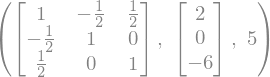

In [2]:
A = Matrix([[1, Fraction("-1/2"), Fraction("1/2")],
            [Fraction("-1/2"), 1, 0],
            [Fraction("1/2"), 0, 1]])
b = Matrix([2, 0, -6])
c = 5

A, b, c

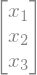

In [3]:
x = Matrix(sympy.symbols("x_1 x_2 x_3"))
x

In [4]:
sympy.simplify(x.T*A*x + b.T*x + Matrix([c]))

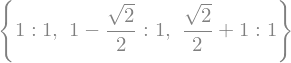

In [5]:
A.eigenvals()

Như vậy $A$ là ma trận xác định dương nên $f$ là hàm lồi ngặt. $f$ có một điểm cực tiểu toàn cục duy nhất.

Vì $A$ xác định dương nên $A$ khả nghịch do đó hệ PTTT 

$$
\nabla f(\boldsymbol{x}) = 2A\boldsymbol{x} + \boldsymbol{b} = \boldsymbol{0}
$$ 

có nghiệm duy nhất là

$$
\boldsymbol{x} = -\frac{1}{2}A^{-1}\boldsymbol{b}.
$$

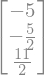

In [6]:
x = Fraction("-1/2") * A.inv() * b
x

In [7]:
x.T*A* x + b.T*x + Matrix([c])

Như vậy $f$ đạt giá trị nhỏ nhất $-\frac{33}{2}$ tại điểm cực tiểu toàn cục $(-5, -\frac{5}{2}, \frac{11}{2})$.

## Ví dụ 11

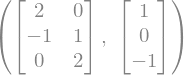

In [8]:
A = Matrix([[2, 0], [-1, 1], [0, 2]])
b = Matrix([1, 0, -1])
A, b

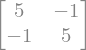

In [9]:
A.T * A

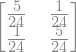

In [10]:
(A.T*A)**(-1)

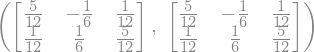

In [11]:
(A.T*A)**(-1)*A.T, A.pinv()

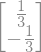

In [12]:
x_hat = A.pinv() * b
x_hat

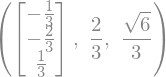

In [13]:
r_hat = A*x_hat - b
r_hat, r_hat.norm() ** 2, r_hat.norm()

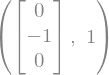

In [14]:
x_tilde = Matrix([Fraction("1/2"), Fraction("-1/2")])
r_tilde = A*x_tilde - b
r_tilde, r_tilde.norm()

## Polynomial fitting

In [15]:
def y(x):
    a = [1, 2, -1, 0, 1]
    return sum(ai*x**i for i, ai in enumerate(a))

In [16]:
xs = list(range(-2, 3))
ys = [y(x) for x in xs]
xs, ys

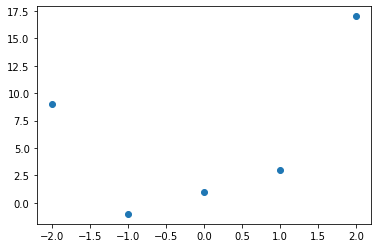

In [17]:
plt.plot(xs, ys, "o")
plt.show()

In [18]:
def getA_y(k, xs, ys):
    As = [[xi**j for j in range(k + 1)] for xi in xs]
    return np.array(As), np.array(ys)

def f_hat(a_hat, x):
    return sum(ai * x**i for i, ai in enumerate(a_hat))

ts = np.linspace(min(xs) - 1, max(xs) + 1, num=50)

### Khớp đa thức bậc 0 (hằng số)

In [19]:
A, y = getA_y(0, xs, ys)
A, y, A.T@A, np.linalg.inv(A.T@A)

(array([[1],
        [1],
        [1],
        [1],
        [1]]),
 array([ 9, -1,  1,  3, 17]),
 array([[5]]),
 array([[0.2]]))

In [20]:
a_hat = np.linalg.pinv(A) @ y
a_hat, sum(ys)/len(ys)

(array([5.8]), 5.8)

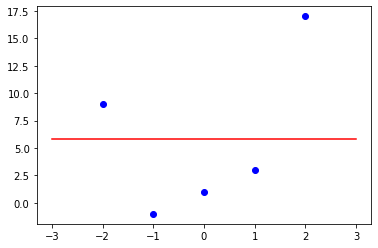

In [21]:
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

### Khớp đa thức bậc 1 (đường thẳng)

In [22]:
A, y = getA_y(1, xs, ys)
A, y, A.T@A, np.linalg.inv(A.T@A)

(array([[ 1, -2],
        [ 1, -1],
        [ 1,  0],
        [ 1,  1],
        [ 1,  2]]),
 array([ 9, -1,  1,  3, 17]),
 array([[ 5,  0],
        [ 0, 10]]),
 array([[0.2, 0. ],
        [0. , 0.1]]))

In [23]:
a_hat = np.linalg.pinv(A) @ y
a_hat

array([5.8, 2. ])

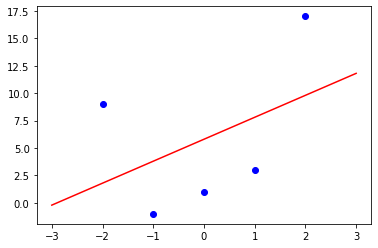

In [24]:
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

### Khớp đa thức bậc 2 (parabol)

In [25]:
A, y = getA_y(2, xs, ys)
A, y, A.T@A, np.linalg.inv(A.T@A)

(array([[ 1, -2,  4],
        [ 1, -1,  1],
        [ 1,  0,  0],
        [ 1,  1,  1],
        [ 1,  2,  4]]),
 array([ 9, -1,  1,  3, 17]),
 array([[ 5,  0, 10],
        [ 0, 10,  0],
        [10,  0, 34]]),
 array([[ 0.48571429,  0.        , -0.14285714],
        [ 0.        ,  0.1       ,  0.        ],
        [-0.14285714, -0.        ,  0.07142857]]))

In [26]:
a_hat = np.linalg.pinv(A) @ y
a_hat

array([-1.05714286,  2.        ,  3.42857143])

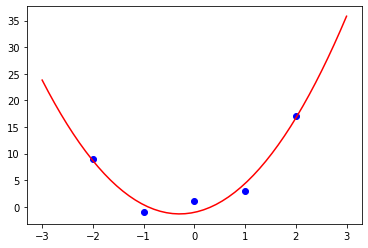

In [27]:
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

### Các đa thức bậc cao hơn

[-1.05714286e+00  2.00000000e+00  3.42857143e+00  4.44089210e-16]


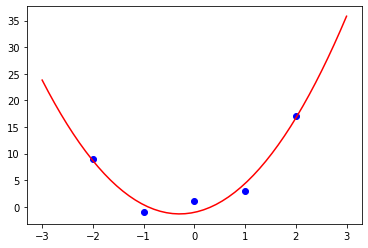

In [28]:
k = 3
A, y = getA_y(k, xs, ys)
a_hat = np.linalg.pinv(A) @ y
print(a_hat)
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

[ 1.  2. -1.  0.  1.]


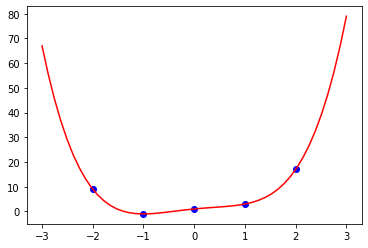

In [29]:
k = 4
A, y = getA_y(k, xs, ys)
a_hat = np.linalg.pinv(A) @ y
print(a_hat)
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

[ 1.          1.23809524 -1.          0.95238095  1.         -0.19047619]


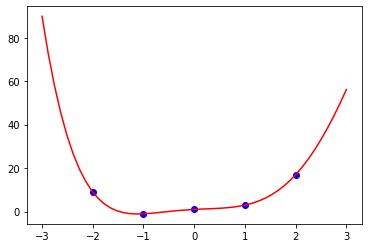

In [30]:
k = 5
A, y = getA_y(k, xs, ys)
a_hat = np.linalg.pinv(A) @ y
print(a_hat)
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()

[ 1.          1.23809524 -0.14285714  0.95238095 -0.07142857 -0.19047619
  0.21428571]


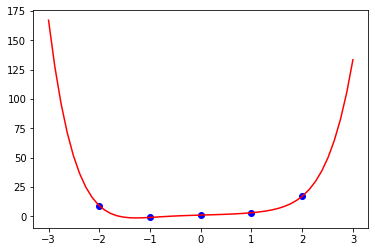

In [31]:
k = 6
A, y = getA_y(k, xs, ys)
a_hat = np.linalg.pinv(A) @ y
print(a_hat)
plt.plot(xs, ys, "o", color="blue")
plt.plot(ts, [f_hat(a_hat, t) for t in ts], color="red")
plt.show()